In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [80]:
t0 = pd.read_csv('pupil_positions_t0.csv')
df = t0.loc[:, ['pupil_timestamp', 'diameter', 'confidence', 'eye_id']]
t1 = pd.read_csv('pupil_positions_t1.csv')
df1 = t1.loc[:, ['pupil_timestamp', 'diameter', 'confidence', 'eye_id']]

In [81]:
#przelicz z-score

df.loc[:, 'diam'] = stats.zscore(df['diameter'])

# zrób na ze wszystkich, które mają confi < 0.6
df.loc[df['confidence'] < .6, 'diam'] = np.nan

start_time = df['pupil_timestamp'][0]
# dołóż dobry czas
df['time'] = df['pupil_timestamp'] - start_time

# określ warunki
df['condition'] = 'recovery'
df.loc[df['time'] < 60, 'condition'] = 'test'
df.loc[df['time'] < 30, 'condition'] = 'baseline'

# czasy relatywnie do warunków
df['cond_time'] = df['time']
df.loc[df['time'] > 60, 'cond_time'] = df['time'] - 60
df.loc[(df['time'] > 30) & (df['time'] < 60), 'cond_time'] = df['time'] - 30

# rozbij na oczy
e0 = df.loc[df['eye_id'] == 0, :]
e1 = df.loc[df['eye_id'] == 1, :]

# zrób na ze wszystkich, które mają confi < 0.6
df1.loc[df1['confidence'] < .6, 'diameter'] = np.nan

#przelicz z-score
df1.loc[:, 'diam'] = (df1.diameter - df1.diameter.mean()) / df1.diameter.std(ddof=0)

start_time = df1['pupil_timestamp'][0]
# dołóż dobry czas
df1['time'] = df1['pupil_timestamp'] - start_time

# określ warunki
df1['condition'] = 'recovery'
df1.loc[df['time'] < 60, 'condition'] = 'test'
df1.loc[df['time'] < 30, 'condition'] = 'baseline'

# czasy relatywnie do warunków
df1['cond_time'] = df['time']
df1.loc[df1['time'] > 60, 'cond_time'] = df1['time'] - 60
df1.loc[(df1['time'] > 30) & (df1['time'] < 60), 'cond_time'] = df1['time'] - 30

# wywal dziwolągi
df1.loc[abs(df1['diam'])>5, 'diam'] = np.nan

# rozbij na oczy
e0_1 = df1.loc[df1['eye_id'] == 0, :]
e1_1 = df1.loc[df1['eye_id'] == 1, :]


In [70]:
e0.tail()

,pupil_timestamp,diameter,confidence,eye_id,diam,time,condition,cond_time
23258,15960.753786,31.137116,0.996249,0,-0.628967,93.834691,recovery,33.834691
23260,15960.761855,31.275080,0.921182,0,-0.588488,93.842760,recovery,33.842760
23262,15960.769924,31.421397,0.919653,0,-0.545558,93.850829,recovery,33.850829
23264,15960.777993,31.375511,0.921708,0,-0.559021,93.858898,recovery,33.858898
23266,15960.786062,31.432377,0.982047,0,-0.542336,93.866967,recovery,33.866967


In [71]:
e0_1.tail()

,pupil_timestamp,diameter,confidence,eye_id,diam,time,condition,cond_time
22679,16096.539339,33.691247,0.998564,0,0.336148,91.526470,recovery,31.526470
22681,16096.547408,33.708937,0.999149,0,0.347876,91.534539,recovery,31.534539
22683,16096.555477,33.718762,0.998641,0,0.354390,91.542608,recovery,31.542608
22685,16096.563546,33.846301,0.999939,0,0.438947,91.550677,recovery,31.550677
22687,16096.571615,33.636443,0.997839,0,0.299814,91.558746,recovery,31.558746


## Pierwsza próba

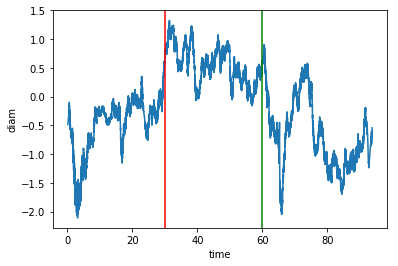

In [62]:
sns.lineplot(x='time', y='diam', data=e0)
plt.axvline(30, c='red')
plt.axvline(60, c='green')

In [85]:
fig = px.line(df, x="time", y="diam", color='eye_id', title='próba 1')
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=30,
            y0=-2,
            x1=30,
            y1=2,
            line=dict(
                color="Red",
                width=2
            )
        ), 
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=60,
            y0=-2,
            x1=60,
            y1=2,
            line=dict(
                color="Green",
                width=2
            )
        ), 
    ])
fig.write_html('proba1.html', auto_open=True)

## Druga próba

In [86]:
fig = px.line(df1, x="time", y="diam", color='eye_id', title='próba 2')
fig.update_layout(
    shapes=[
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=30,
            y0=-3,
            x1=30,
            y1=3,
            line=dict(
                color="Red",
                width=2
            )
        ), 
        # Line Vertical
        go.layout.Shape(
            type="line",
            x0=60,
            y0=-3,
            x1=60,
            y1=3,
            line=dict(
                color="Green",
                width=2
            )
        ), 
    ])
fig.write_html('proba2.html', auto_open=True)

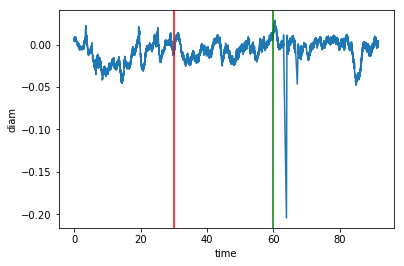

In [43]:
sns.lineplot(x='time', y='diam', data=e1_1)
plt.axvline(30, c='red')
plt.axvline(60, c='green')

# Pierdoły

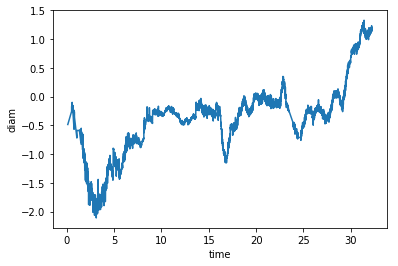

In [8]:
sns.lineplot(x='time', y='diam', data=e0[:4000])

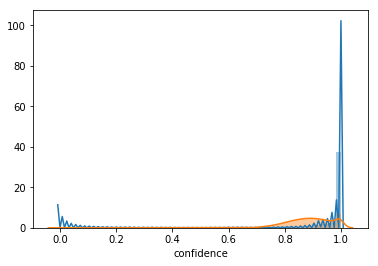

In [24]:
sns.distplot(e0['confidence'])
sns.distplot(e1['confidence'])

# FFT

In [132]:
def make_fft(signal):
    n_samples = len(signal)
    fft_freq = np.fft.fftfreq(n_samples, sample_spacing)
    fft_vals = np.fft.fft(signal)
    fft_df = pd.DataFrame({'freq':fft_freq, 'val':abs(fft_vals)})
    return fft_df[(fft_df['freq']>0)]

In [138]:
# lepsze jest oko 1, więc tylko to weźmiemy
# najpierw baseline
baseline = df[(df['condition'] == 'baseline') & (df['eye_id']==1)]

czas_przes = baseline['time'].values[1:]
time_diff = baseline['time'][:-1] - czas_przes
sample_spacing = time_diff.mean()

signal = baseline['diameter']
fft_baseline = make_fft(signal)
fft_baseline['cond'] = 'baseline'

signal = df.loc[(df['condition'] == 'test') & (df['eye_id']==1), 'diameter']
fft_test = make_fft(signal)
fft_test['cond'] = 'test'

signal = df.loc[(df['condition'] == 'recovery') & (df['eye_id']==1), 'diameter']
fft_recovery = make_fft(signal)
fft_recovery['cond'] = 'recovery'

fft_all = pd.concat([fft_baseline, fft_test, fft_recovery])


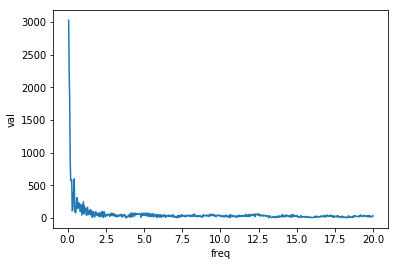

In [134]:
sns.lineplot('freq', 'val', data=fft_df[(fft_df['freq']>0.05)&(fft_df['freq']<20)])

In [141]:
fig = px.line(fft_all[fft_all['freq'] < 2], x="freq", y="val", color="cond", title='fft - próba 1, oko1')
fig.write_html('fft_proba1.html', auto_open=True)